# Imports & Setup

<font color='red'>**Please run `inference.py` scrpit before running this notebook to ensure the API is running.**<font color='red'> If uncommented, the below cell will run it if it is in the same directory as this notebook and if the notebook environment has all package dependancies installed.

In [1]:
# ! python inference.py

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
sns.set_theme()
sns.set_style('white')

import requests

In [3]:
def check_responses(meter_id, url):
    response_preds = []
    payload = {'meter_id':meter_id,
               'csv_url':url}
    return requests.get('http://127.0.0.1:5000/api/predict', params=payload)

# Provide parameters and get response from API

The user provides the ID of the meter that they want to recieve the predictions for and the URL of a csv file with the input weather features over the required time range at an appropriate time interval.

Each response takes ~10s due to the requirement to load the appropriate model corresponding to the meter ID with each request.

In [4]:
response1 = check_responses(201130, 'https://raw.githubusercontent.com/Jamie-B22/Data/main/201130_weather_feats.csv')
response1

<Response [200]>

In [5]:
response2 = check_responses(200713, 'https://raw.githubusercontent.com/Jamie-B22/Data/main/200713_weather_feats.csv')
response2

<Response [200]>

# Response JSON

In [6]:
response1.json()

{'consumption': [47.98529815673828,
  47.9216194152832,
  47.71574783325195,
  47.373130798339844,
  46.99703598022461,
  47.096595764160156,
  52.89834213256836,
  63.04010009765625,
  66.60328674316406,
  69.84334564208984,
  72.06463623046875,
  73.7605972290039,
  75.6099624633789,
  76.84757232666016,
  77.11754608154297,
  76.03777313232422,
  69.08061981201172,
  61.154693603515625,
  57.8123893737793,
  56.029354095458984,
  54.93405532836914,
  54.138832092285156,
  53.75402069091797,
  53.29317092895508,
  52.92161560058594,
  52.551631927490234,
  52.1015739440918,
  51.50434875488281,
  50.841346740722656,
  50.819969177246094,
  58.32719421386719,
  70.52778625488281,
  75.45931243896484,
  77.79900360107422,
  78.78119659423828,
  78.7580337524414,
  77.97795104980469,
  76.96775817871094,
  75.89982604980469,
  74.71537780761719,
  71.96734619140625,
  65.64737701416016,
  62.03148651123047,
  59.86771774291992,
  58.36174392700195,
  57.3625373840332,
  56.5475692749023

In [7]:
response2.json()

{'consumption': [4.965879917144775,
  4.884619235992432,
  4.7506866455078125,
  4.653196334838867,
  4.4971771240234375,
  5.400354385375977,
  18.66895866394043,
  25.25804328918457,
  26.898256301879883,
  26.87898063659668,
  26.25795555114746,
  25.001026153564453,
  23.478656768798828,
  22.13750648498535,
  21.2650203704834,
  18.85647964477539,
  6.665204048156738,
  4.3315958976745605,
  4.278157711029053,
  4.434513092041016,
  4.489884376525879,
  4.489948272705078,
  4.546031951904297,
  4.441746711730957,
  4.336017608642578,
  4.344733238220215,
  4.303231239318848,
  4.283323287963867,
  4.178147792816162,
  4.822907447814941,
  22.395042419433594,
  29.408742904663086,
  30.100887298583984,
  30.308629989624023,
  30.92971420288086,
  32.19596481323242,
  33.65970230102539,
  35.02988815307617,
  35.89325714111328,
  33.389366149902344,
  7.053244113922119,
  5.909156799316406,
  5.406069755554199,
  5.291705131530762,
  5.051001071929932,
  4.930083751678467,
  4.80503

# Example Plots

In [8]:
results1 = pd.DataFrame(response1.json()).head(1000)
results2 = pd.DataFrame(response2.json()).head(1000)

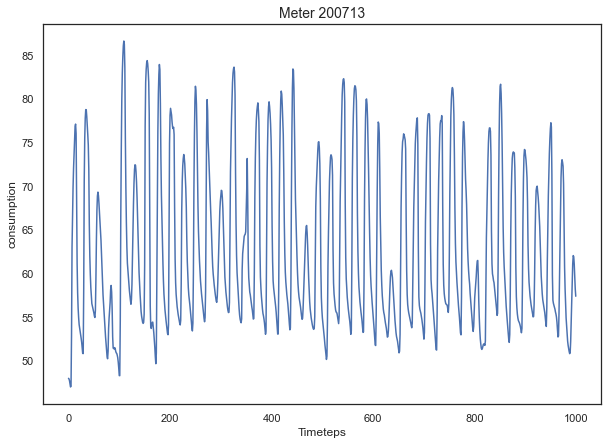

In [9]:
plt.figure(figsize=(10,7))
sns.lineplot(x=results1.index,y=results1['consumption'])
plt.title('Meter 200713', fontsize=14)
plt.xlabel('Timeteps')
plt.show()

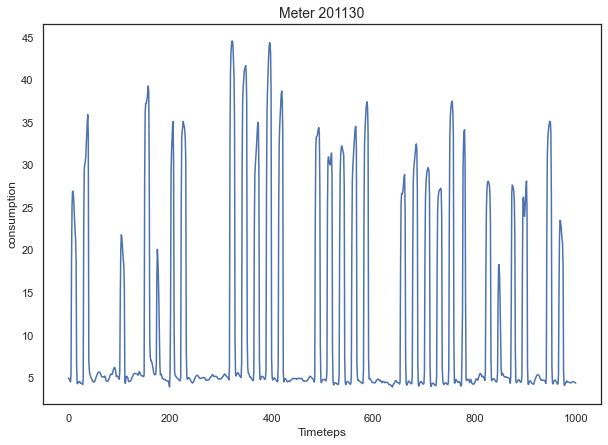

In [10]:
plt.figure(figsize=(10,7))
sns.lineplot(x=results2.index,y=results2['consumption'])
plt.title('Meter 201130', fontsize=14)
plt.xlabel('Timeteps')
plt.show()

# Business IDs & Meter IDs

If the user wants to see what businesses they can request data for (unfortunately anonomysed as IDs so we didnt have to sign an NDA):

In [11]:
requests.get('http://127.0.0.1:5000/api/business_ids').json()

['393403',
 '393409',
 '393414',
 '393421',
 '394450',
 '394463',
 '394475',
 '394485',
 '394493',
 '394569',
 '396397',
 '396411',
 '396423',
 '396495',
 '396517',
 '396524',
 '396610',
 '396637',
 '396753',
 '396766',
 '396773',
 '396786',
 '397435',
 '398119',
 '398351',
 '398387',
 '400145',
 '400159',
 '400222',
 '400241',
 '400256',
 '400276',
 '400290',
 '400337',
 '400348',
 '400362',
 '400377',
 '400390',
 '400407',
 '400447',
 '400457',
 '400471',
 '400504',
 '402077',
 '405949',
 '405955',
 '405963',
 '407264',
 '418174',
 '418191',
 '418215',
 '418258',
 '418276',
 '423832',
 '423835',
 '423850',
 '424341',
 '424438',
 '425272',
 '425299',
 '425300',
 '425306',
 '425311',
 '425312',
 '425318',
 '425326',
 '425327',
 '425335',
 '425343',
 '425347',
 '425349',
 '425354',
 '425355',
 '425362',
 '425374',
 '425388',
 '425400',
 '425406',
 '425412',
 '425418',
 '425422',
 '425424',
 '425426',
 '425427',
 '425430',
 '425433',
 '425434',
 '425437',
 '425439',
 '425465',
 '425486',

An what meter within each business:

In [12]:
payload = {'business_id': "393403"}
requests.get('http://127.0.0.1:5000/api/meter_ids', params=payload).json()

['200713']